In [1]:
# Importação das bibliotecas basicas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import holoviews as hv
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import  warnings
warnings.filterwarnings("ignore")

In [2]:
#Leitura do arquivo
df = pd.read_csv('hmeq.csv')

In [3]:
# Abaixo podemos verificar o conteúdo da base
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [4]:
#Verificamos agora os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
# Verificando os valores nulos
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

<AxesSubplot:title={'center':'REASON'}>

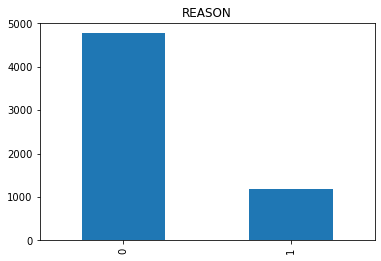

In [7]:
# Analise Exploratória
df["BAD"].value_counts().plot.bar(title='REASON')

<AxesSubplot:title={'center':'REASON'}>

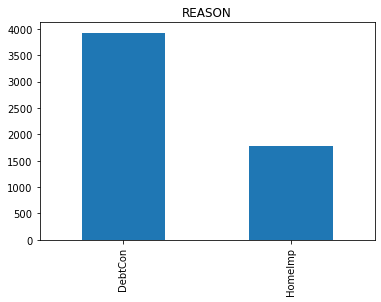

In [8]:
#Visualizando a variável categorica REASON
REASON_count= df["REASON"].value_counts().rename_axis('REASON').reset_index(name='Total Count')
df["REASON"].value_counts().plot.bar(title='REASON')

<AxesSubplot:title={'center':'JOB'}>

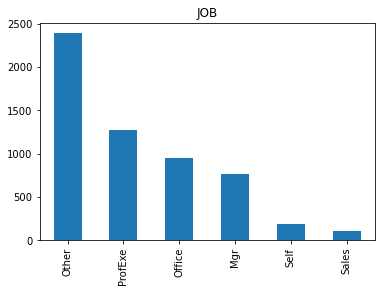

In [9]:
#visualizando  a variável categórica JOB
JOB_count= df["JOB"].value_counts().rename_axis('JOB').reset_index(name='Total Count')
df["JOB"].value_counts().plot.bar(title='JOB')

<AxesSubplot:title={'center':'JOB vs BAD'}, xlabel='JOB'>

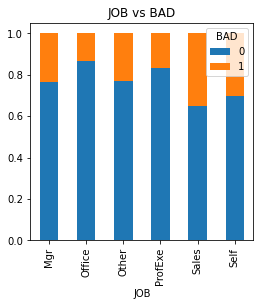

In [9]:
#Relação JOB vs BAD
JOB=pd.crosstab(df['JOB'],df['BAD'])
JOB.div(JOB.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='JOB vs BAD', figsize=(4,4))

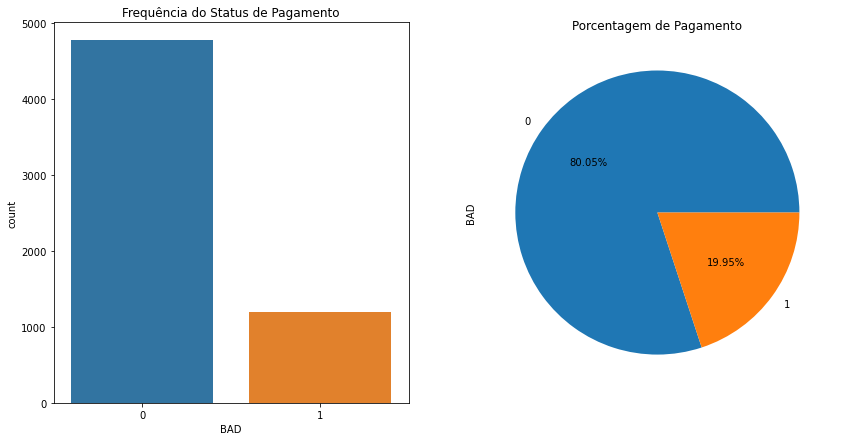

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='BAD',data=df,ax=axs[0])
axs[0].set_title("Frequência do Status de Pagamento")
df.BAD.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Porcentagem de Pagamento")
plt.show()

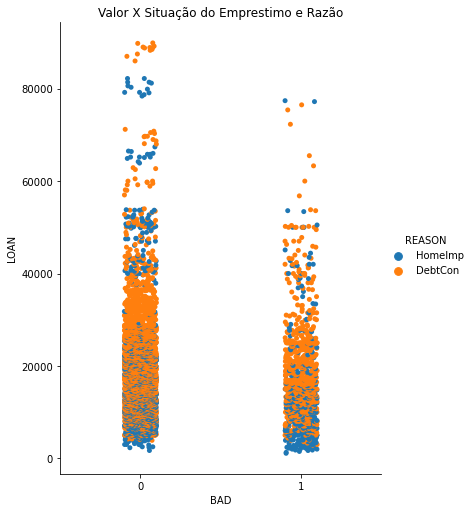

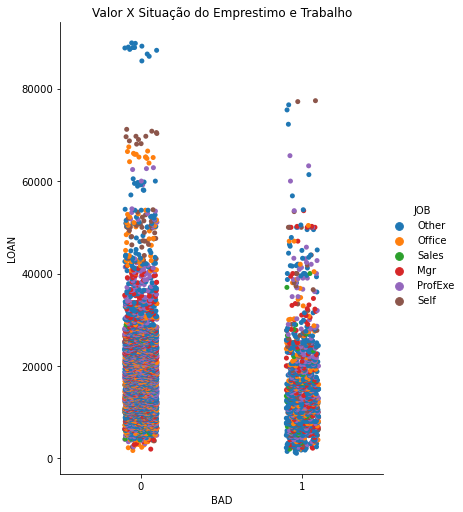

In [11]:
# Relação PAGOU x VALOR EMPRESTIMO + REASON
sns.catplot(x='BAD', y='LOAN', hue='REASON', data=df, height=7, aspect=.8).set(title="Valor X Situação do Emprestimo e Razão")
sns.catplot(x='BAD', y='LOAN', hue='JOB', data=df, height=7, aspect=.8).set(title="Valor X Situação do Emprestimo e Trabalho")

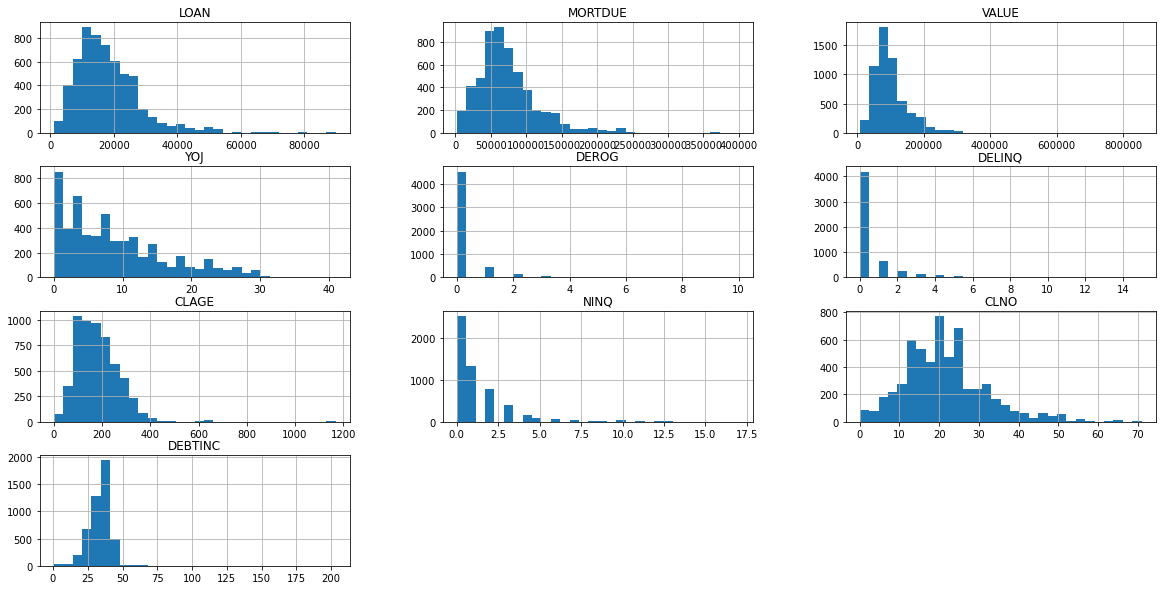

In [12]:
# Histogramas das variávis explicativa numericas 
numeric_feats = [c for c in df.columns if df[c].dtype != 'object'and c not in ['BAD']]
df_numeric_feats = df[numeric_feats]

im = df_numeric_feats.hist(figsize=(20,10), bins=30)


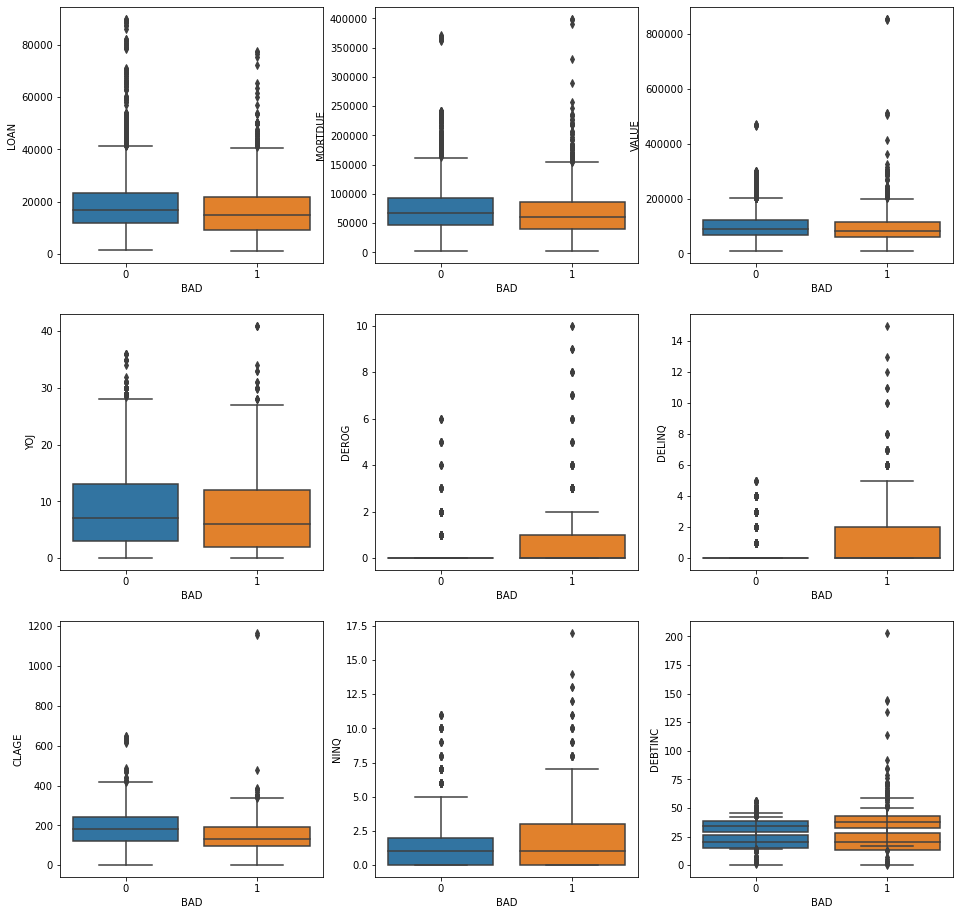

In [13]:
# BoxPlot das variavéis explicativas por condição do emprestimo
plt.figure(figsize=(16,16))
c = 1
for i in df_numeric_feats.columns:
    if c < len(df_numeric_feats.columns):
        plt.subplot(3,3,c)
        sns.boxplot(x='BAD' , y= i, data=df)
        c+=1
    else:
        sns.boxplot(x='BAD' , y= i, data=df)

In [45]:
plt.savefig('teste.png', format='png')

AttributeError: 'numpy.ndarray' object has no attribute 'plt'

<AxesSubplot:xlabel='JOB', ylabel='MORTDUE'>

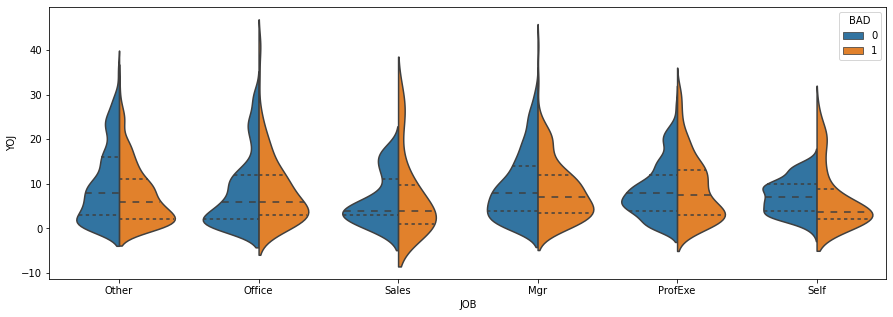

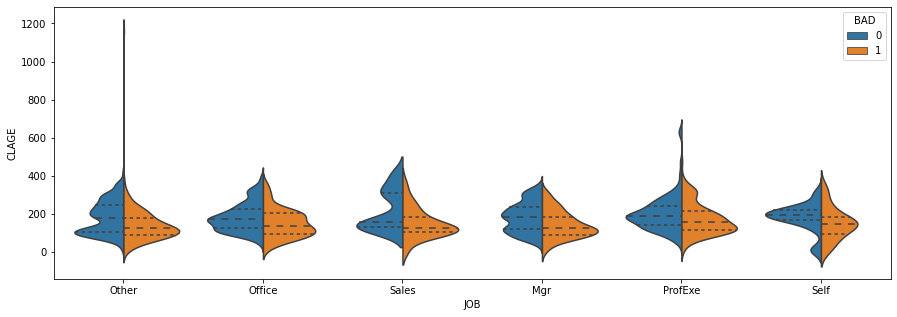

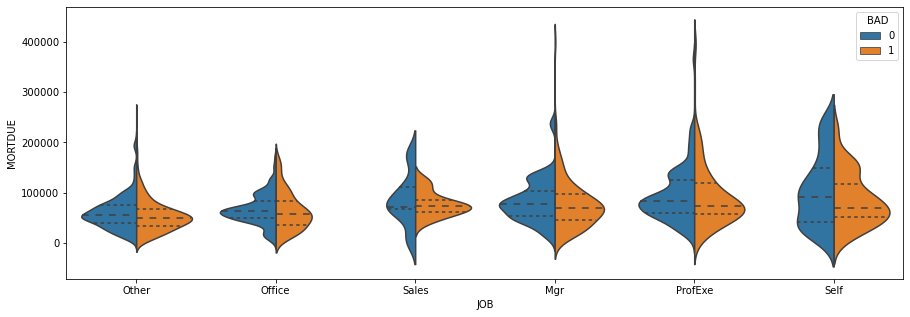

In [14]:
# Relação do Trabalho X Tempo de Trabalho e Situação do Emprestimo
plt.figure(figsize=(15,5))
sns.violinplot(x='JOB', y='YOJ', hue='BAD',split=True, inner="quart", data=df)  
# Relação do Trabalho X Tempo do Emprestimo Mais Antigo e Situação do Emprestimo
plt.figure(figsize=(15,5))
sns.violinplot(x='JOB', y='CLAGE', hue='BAD',split=True, inner="quart",data=df)   
# Relação do Trabalho X Valor da Hipoteca e Situação do Emprestimo
plt.figure(figsize=(15,5))
sns.violinplot(x='JOB', y='MORTDUE', hue='BAD', split=True, inner="quart",data=df)

In [31]:
#Imputação de dados nas colunas
df.loc[df['MORTDUE'].isnull(),'MORTDUE'] = 0
df.loc[df['VALUE'].isnull(),'VALUE'] = 0
df.loc[df['JOB'].isnull(),'JOB'] = 'None'
df.loc[df['REASON'].isnull(),'REASON'] = 'Other'
df.loc[df['YOJ'].isnull(),'YOJ'] = 0
df.loc[df['DEROG'].isnull(),'DEROG'] = 0
df.loc[df['DELINQ'].isnull(),'DELINQ'] = 0
df.loc[df['CLAGE'].isnull(),'CLAGE'] = 0
df.loc[df['NINQ'].isnull(),'NINQ'] = 0
df.loc[df['CLNO'].isnull(),'CLNO'] = 0
df.loc[df['DEBTINC'].isnull(),'DEBTINC'] = 0

In [32]:
#Listagem das classes de JOB
df['JOB'].unique()

array(['Other', 'None', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [33]:
#Listagem das classes de REASON
df['REASON'].unique()

array(['HomeImp', 'Other', 'DebtCon'], dtype=object)

In [34]:
#Definição da função para transformar a informação textual da coluna REASON em codificacao numerica
def REASONN (row):
   if row['JOB'] == 'Other':
      return 0
   if row['JOB'] == 'HomeImp':
      return 1
   if row['JOB'] == 'DebtCon':
      return 2
   return 3
df['REASONN'] = df.apply (lambda row: REASONN(row), axis=1)

In [35]:
#Definição da função para transformar informar textual da coluna JOB em codificacao numerica
def JOBN (row):
   if row['JOB'] == 'Other':
      return 0
   if row['JOB'] == 'Office':
      return 1
   if row['JOB'] == 'Sales':
      return 2
   if row['JOB'] == 'Mgr':
      return 3
   if row['JOB'] == 'ProfExe':
      return 4
   if row['JOB'] == 'Self':
      return 5
   return 6
df['JOBN'] = df.apply (lambda row: JOBN(row), axis=1)

In [36]:
#Contagem de valores nulos na base
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
REASONN    0
JOBN       0
dtype: int64

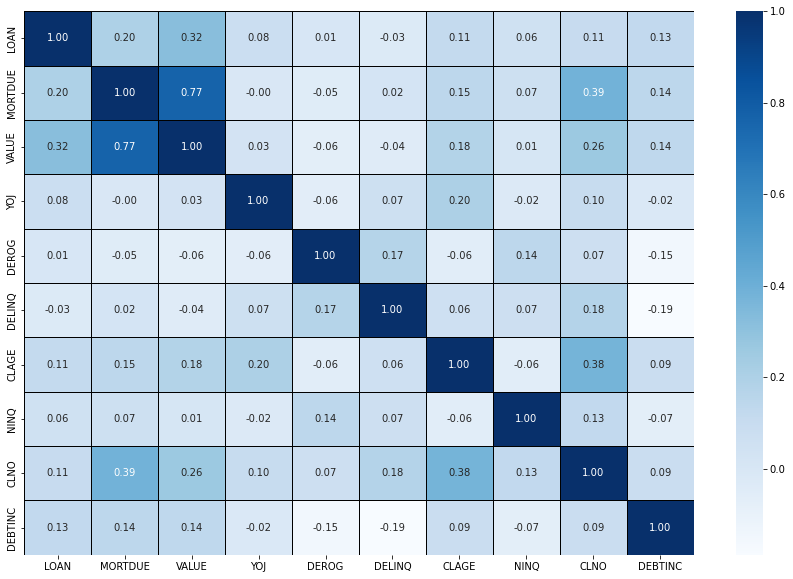

In [37]:
# Correlação entre as 10 variáveis determinantes para o risco de credito.

df_c= df[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]
df_c.corr()

# Plotando a correlação
# Aumentando a area do gráfico
f, ax =plt.subplots(figsize=(15,10))
sns.heatmap(df_c.corr(), annot=True, fmt='.2f', linecolor='black', lw=.7, ax=ax, cmap=plt.cm.Blues)
plt.show()

<AxesSubplot:>

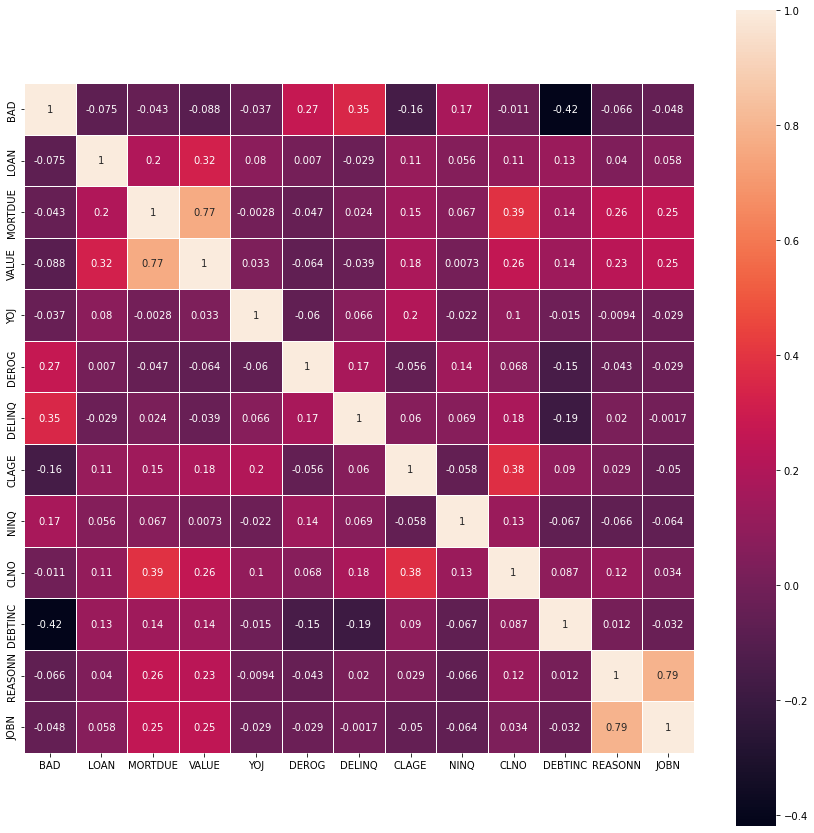

In [38]:
# Correlação das variáveis numéricas
plt.figure(figsize= (15, 15))

sns.heatmap(df.corr(), square=True, annot=True, linewidth=0.5)

In [39]:
# Separando as colunas para a construção do modelo
feats = [c for c in df.columns if c not in ['BAD','REASON','JOB']]

In [40]:
#Conteudo da base de dados
df.T

,0,1,2,3,4,5,6,7,8,9,...,5950,5951,5952,5953,5954,5955,5956,5957,5958,5959
BAD,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
LOAN,1100,1300,1500,1500,1700,1700,1800,1800,2000,2000,...,87500,88300,88500,88800,88900,88900,89000,89200,89800,89900
MORTDUE,25860.0,70053.0,13500.0,0.0,97800.0,30548.0,48649.0,28502.0,32700.0,0.0,...,55938.0,54004.0,50240.0,53307.0,48919.0,57264.0,54576.0,54045.0,50370.0,48811.0
VALUE,39025.0,68400.0,16700.0,0.0,112000.0,40320.0,57037.0,43034.0,46740.0,62250.0,...,86794.0,94838.0,94687.0,94058.0,93371.0,90185.0,92937.0,92924.0,91861.0,88934.0
REASON,HomeImp,HomeImp,HomeImp,Other,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,...,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon
JOB,Other,Other,Other,None,Office,Other,Other,Other,Other,Sales,...,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other
YOJ,10.5,7.0,4.0,0.0,3.0,9.0,5.0,11.0,3.0,16.0,...,15.0,16.0,16.0,16.0,15.0,16.0,16.0,15.0,14.0,15.0
DEROG,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DELINQ,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
CLAGE,94.366667,121.833333,149.466667,0.0,93.333333,101.466002,77.1,88.76603,216.933333,115.8,...,223.88104,193.702051,214.426206,218.304978,205.650159,221.808718,208.69207,212.279697,213.892709,219.601002


In [62]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.25, random_state=42)

In [63]:
# Instanciando o random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, n_estimators=200, oob_score=True, random_state=42)

In [64]:
#Aplicando o RandomForest à base
rf.fit(train[feats], train['BAD'])

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [65]:
# Prevendo o BAD de teste usando o modelo treinado
y_test_pred = rf.predict(test[feats]).astype(int)

In [66]:
#Importação do pacote para aferição d acuracia
from sklearn.metrics import accuracy_score

In [67]:
# Medida da acurácia
accuracy_score(test['BAD'], y_test_pred)

0.9107382550335571

In [68]:
#Vamos usar agora um método de medida mais confiável - AUROC - Area sob a curva ROC
#Geramos as probabilidades das classes na previsão (necessário para a rotina de medida AUROC)
y_test_prob = rf.predict_proba(test[feats])

In [69]:
#Pega so uma coluna para efetuar o teste
y_test_prob = [p[1] for p in y_test_prob]

In [70]:
#Importando o pacote para a medida da acuracia AUROC
from sklearn.metrics import roc_auc_score

In [71]:
#Medida da acurácia  usando a area sob a curva ROC - AUROC
roc_auc_score(test['BAD'], y_test_prob) 

0.9669268682633463

In [72]:
#Importação de paaotes para plotagem de graficos
from sklearn import metrics
import matplotlib.pyplot as plt

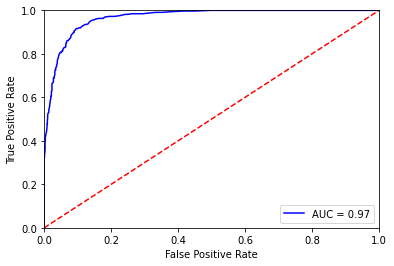

In [98]:
#Curva ROC para os dados originais


fpr, tpr, threshold = metrics.roc_curve(test['BAD'], y_test_prob)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

#plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
plt.savefig('teste.png', format='png')

<Figure size 432x288 with 0 Axes>

In [53]:
#Prevendo os dados para a matriz de confusão
cnf_matrix = metrics.confusion_matrix(test['BAD'], y_test_pred)
cnf_matrix

array([[895,  32],
       [ 73, 192]], dtype=int64)

Text(0.5, 257.44, 'Predito')

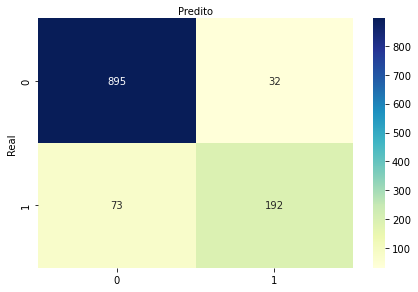

In [100]:
# import required modules
# is scikit's classifier.predict() using 0.5 by default?

#In probabilistic classifiers, yes. It's the only sensible threshold from a mathematical viewpoint, as others have explained.
import seaborn as sns 

%matplotlib inline
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Real')
plt.xlabel('Predito')

In [55]:
#Por ultimo geramos o relatorio com medidas da qualidade das predições
classific = metrics.classification_report(test['BAD'], y_test_pred)

In [56]:
print(classific)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       927
           1       0.86      0.72      0.79       265

    accuracy                           0.91      1192
   macro avg       0.89      0.85      0.86      1192
weighted avg       0.91      0.91      0.91      1192



In [119]:
# XGBoost

# Importar o modelo
from xgboost import XGBClassifier

# Instanciar o modelo
xgb = XGBClassifier(n_estimators=200, n_jobs=-1, random_state=42, learning_rate=0.05)

In [120]:
# Usando o cross validation
scores = cross_val_score(xgb, train[feats], train['BAD'], n_jobs=-1, cv=5)

scores, scores.mean()

(array([0.91, 0.9 , 0.91, 0.91, 0.91]), 0.9102908277404922)

In [121]:
# Usando o XGB para treinamento e predição
xgb.fit(train[feats], train['BAD'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [123]:
# Fazendo predições
preds = xgb.predict(test[feats])

In [124]:
# Medir o desempenho do modelo
from sklearn.metrics import accuracy_score

accuracy_score(test['BAD'], preds)

0.9161073825503355

In [125]:
#Prevendo os dados para a matriz de confusão
cnf_matrix = metrics.confusion_matrix(test['BAD'], y_test_pred)
cnf_matrix

array([[1129,   37],
       [  96,  228]], dtype=int64)

Text(0.5, 257.44, 'Predito')

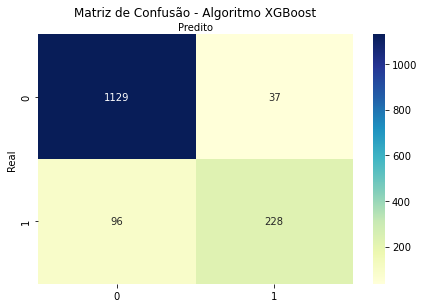

In [126]:
%matplotlib inline
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusão - Algoritmo XGBoost')
plt.ylabel('Real')
plt.xlabel('Predito')

In [112]:
# regressão logistica
#importando os módulos necessários
from sklearn.model_selection import train_test_split
import itertools
from sklearn.linear_model import LogisticRegression

# removendo os recursos BAD,JOB,REASON do conjunto de recursos de entrada
x_basic = df.drop(columns=["BAD","JOB","REASON"])
y = df["BAD"]

# Dividindo os dados em conjuntos de teste e treinamento
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Treinando o modelo básico de regressão logística com conjunto de treinamento
logreg_basic.fit(x_basic_tr,y_tr)

# Imprimindo os coeficientes
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Prevendo a saída dos casos de teste usando o algoritmo criado acima
y_pre = logreg_basic.predict(x_basic_te)

# Validando o algoritmo usando várias métricas de desempenho
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-0.]

coefficients 
[[ 9.66e-06  8.43e-06 -5.83e-06  3.40e-04  2.22e-03  3.46e-03 -2.85e-03
   2.81e-03  5.86e-03 -5.94e-02 -8.57e-04 -1.20e-03]]

accuracy score :  0.8286731062531775
f1 score :  0.6284212644615638
precision score :  0.8128413028413028
recall score :  0.6068446398197442


In [113]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predito')

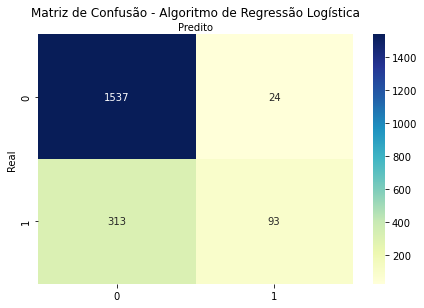

In [117]:
%matplotlib inline
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusão - Algoritmo de Regressão Logística')
plt.ylabel('Real')
plt.xlabel('Predito')